In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import metrics
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [20]:
data = pd.read_csv("C:/Users/User/Desktop/695/HW/Titanic.csv")

In [21]:
X = data[['pclass','sex','age','sibsp']]
Y = data['survived']
X['age'].fillna(X['age'].mean(),inplace=True)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)
vec = DictVectorizer(sparse = False)
X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))
X_test = vec.transform(X_test.to_dict(orient = 'record'))

In [23]:
#I will store the structure of the tree in pdf 
def creat_pdf(dtc, filename):
    dot_data = StringIO()
    tree.export_graphviz(dtc, out_file=dot_data, feature_names = vec.get_feature_names(), class_names = ['died','survived'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf("%s.pdf" %filename)

In [24]:
def get_accuracy(metrix):
    survivors_predicted_accuracy = float(metrix[1][1])/float(metrix[1][1] + metrix[0][1])
    fatalities_predicted_accuracy = float(metrix[0][0])/float(metrix[0][0] + metrix[1][0])
    return survivors_predicted_accuracy, fatalities_predicted_accuracy

In [25]:
dtc = tree.DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,Y_train)
Y_train_predict = dtc.predict(X_train)
cm_train = metrics.confusion_matrix(Y_train,Y_train_predict)
#print "Tree without Pruning:"
print "in‐sample percent survivors correctly predicted is %0.2f" %(get_accuracy(cm_train)[0])
print "in-sample percent fatalities correctly predicted is %0.2f" %(get_accuracy(cm_train)[1])
Y_test_predict = dtc.predict(X_test)
cm_test = metrics.confusion_matrix(Y_test,Y_test_predict)
print "out-of‐sample percent survivors correctly predicted is %0.2f"  %(get_accuracy(cm_test)[0])
print "out-of-sample percent fatalities correctly predicted is %0.2f" %(get_accuracy(cm_test)[1])
creat_pdf(dtc, "tree without pruning")

in‐sample percent survivors correctly predicted is 0.93
in-sample percent fatalities correctly predicted is 0.87
out-of‐sample percent survivors correctly predicted is 0.73
out-of-sample percent fatalities correctly predicted is 0.77


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


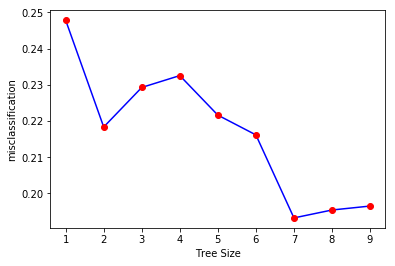

In [26]:
max_leaf_nodes = [None] + range(2,10)
misclassification = []
parameters = {'max_leaf_nodes':max_leaf_nodes}
dtc = tree.DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(dtc, parameters, cv = 10, scoring = 'accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
for score in grid_search.grid_scores_:
     misclassification.append(1-score[1])
max_leaf_nodes[0] = 1
plt.plot(max_leaf_nodes, misclassification, 'b')
plt.plot(max_leaf_nodes, misclassification, 'ro')
plt.xlabel("Tree Size")
plt.ylabel("misclassification")
plt.show()

In [27]:
dtc = tree.DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'])
dtc.fit(X_train,Y_train)
Y_train_predict = dtc.predict(X_train)
cm_train = metrics.confusion_matrix(Y_train,Y_train_predict)
print "Tree with Pruning:"
print "Tree Info: criterion ='entropy', max_leaf_nodes = %d" %(grid_search.best_params_['max_leaf_nodes'])
print "in‐sample percent survivors correctly predicted is %0.2f"  %(get_accuracy(cm_train)[0])
print "in-sample percent fatalities correctly predicted is %0.2f" %(get_accuracy(cm_train)[1])
Y_test_predict = dtc.predict(X_test)
cm_test = metrics.confusion_matrix(Y_test,Y_test_predict)
print "out-of-sample percent survivors correctly predicted is %0.2f" %(get_accuracy(cm_test)[0])
print "out-of-sample percent fatalities correctly predicted is %0.2f" %(get_accuracy(cm_test)[1])
creat_pdf(dtc, "tree with pruning")

Tree with Pruning:
Tree Info: criterion ='entropy', max_leaf_nodes = 7
in‐sample percent survivors correctly predicted is 0.82
in-sample percent fatalities correctly predicted is 0.82
out-of-sample percent survivors correctly predicted is 0.78
out-of-sample percent fatalities correctly predicted is 0.79
